#### 로지스틱 회귀( Logistic Regression) 
- 참/거짓 사이 구분하는 S 자 형태의 선 그리는 작업

#### 시그모이드 함수 ( Sigmoid Function)
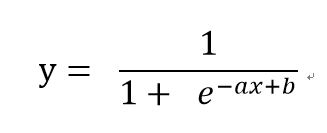

- a : 그래프의 경사도
- b : 그래프의 좌우 이동
    - a가 클수록 경사가 가파르다, 
    - b가 클수록 우로 이동
    
    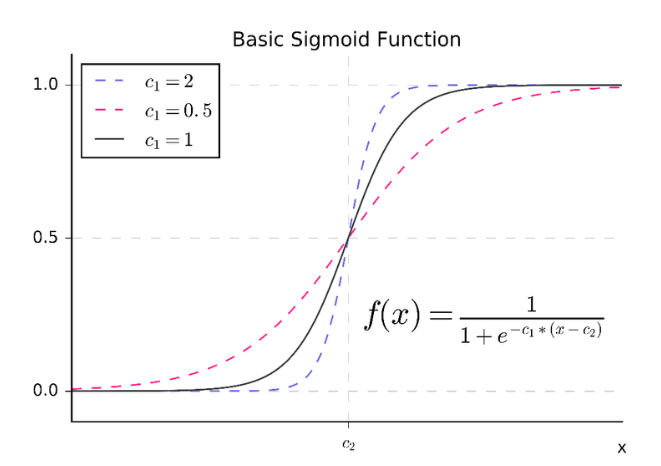
- 실제 값이 1일 때 0에 가까워지면 오차가 커진다 -> 로그함수 활용


#### 로그 함수
-{ ylogh + (1-y) log⁡(1-h) }


In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

data=[[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]]
x_data = [x_row[0] for x_row in data]
y_data = [y_row[1] for y_row in data]

a=tf.Variable(tf.random.normal([1], dtype=tf.float64, seed=0))
b=tf.Variable(tf.random.normal([1], dtype=tf.float64, seed=0))

# 시그모어드 함수 방정식 구현
y = 1/(1+np.e**(a*x_data + b))
    
# 로그 함수 구현
loss = -tf.reduce_mean(np.array(y_data) * tf.log(y) + (1-np.array(y_data)) * tf.log(1-y))

learning_rate=0.5
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(60001):
        sess.run(gradient_decent)
        if i%6000==0:
            print('Epoch : %.f, loss = %.4f, 기울기 a= %.4f, y절편 = %.4f'%(i,sess.run(loss), sess.run(a), sess.run(b)))

Instructions for updating:
non-resource variables are not supported in the long term
Epoch : 0, loss = 1.2676, 기울기 a= 0.1849, y절편 = -0.4334
Epoch : 6000, loss = 0.0152, 기울기 a= -2.9211, y절편 = 20.2982
Epoch : 12000, loss = 0.0081, 기울기 a= -3.5637, y절편 = 24.8010
Epoch : 18000, loss = 0.0055, 기울기 a= -3.9557, y절편 = 27.5463
Epoch : 24000, loss = 0.0041, 기울기 a= -4.2380, y절편 = 29.5231
Epoch : 30000, loss = 0.0033, 기울기 a= -4.4586, y절편 = 31.0675
Epoch : 36000, loss = 0.0028, 기울기 a= -4.6396, y절편 = 32.3346
Epoch : 42000, loss = 0.0024, 기울기 a= -4.7930, y절편 = 33.4086
Epoch : 48000, loss = 0.0021, 기울기 a= -4.9261, y절편 = 34.3406
Epoch : 54000, loss = 0.0019, 기울기 a= -5.0436, y절편 = 35.1636
Epoch : 60000, loss = 0.0017, 기울기 a= -5.1489, y절편 = 35.9005


### 결과
- 오차 loss 값은 점차 줄어들고 a, b 의 최적값을 찾아감

## 여러 입력값을 갖는 로지스틱 회귀

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

# 실행마다 같은 결과 출력을 위한 seed 값 설정
seed=0
np.random.seed(seed)
tf.set_random_seed(seed)

# x, y 의 데이터 값
x_data = np.array([[2,3],[4,3],[6,4],[8,6],[10,7],[12,8],[14,9]])
y_data = np.array([0,0,0,1,1,1,1]).reshape(7,1)

# placeholder 는 입력 값을 저장하는 그릇
# placeholder("데이터형", "행렬의 차원", "이름")
X=tf.placeholder(tf.float64, shape=[None,2])
Y=tf.placeholder(tf.float64, shape=[None,1])

# 기울기 a 와 바이어스 b 의 값을 임의로 정함
                            # [ 2,1] 의미 : 들어오는 값 2개 나가는 값 1개
a= tf.Variable(tf.random_uniform([2,1], dtype=tf.float64))
b= tf.Variable(tf.random_uniform([1], dtype=tf.float64))

# y 시그모이드 함수의 방정식
# 행렬 곱 계산 [a1x1 + a2x2]
y=tf.sigmoid(tf.matmul(X,a)+b)

# 오차 구하는 함수
loss = -tf.reduce_mean(Y*tf.log(y) + (1-Y)*tf.log(1-y))

# 학습률 값
learning_rate=0.1

# 오차를 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

predicted = tf.cast(y>0.5, dtype=tf.float64)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float64))

# 학습
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(3001):
        a_, b_, loss_, _ = sess.run([a, b, loss, gradient_decent], feed_dict={X : x_data, Y: y_data})
        if (i+1)%300 ==0:
            print("step = %d, a1=%.4f, a2=%.4f, b=%.4f, loss=%.4f"%(i+1, a_[0], a_[1], b_, loss_))

step = 300, a1=0.8474, a2=-0.6193, b=-2.3197, loss=0.2738
step = 600, a1=0.8428, a2=-0.3372, b=-3.8129, loss=0.1956
step = 900, a1=0.7499, a2=-0.0029, b=-4.8919, loss=0.1524
step = 1200, a1=0.6439, a2=0.3089, b=-5.7442, loss=0.1245
step = 1500, a1=0.5430, a2=0.5863, b=-6.4500, loss=0.1049
step = 1800, a1=0.4520, a2=0.8307, b=-7.0529, loss=0.0905
step = 2100, a1=0.3712, a2=1.0461, b=-7.5791, loss=0.0795
step = 2400, a1=0.2998, a2=1.2371, b=-8.0462, loss=0.0708
step = 2700, a1=0.2367, a2=1.4075, b=-8.4662, loss=0.0638
step = 3000, a1=0.1806, a2=1.5606, b=-8.8477, loss=0.0581


### 실제값 적용하기

In [14]:
# 7시간 공부하고 과이를 6번 받은 학생의 합격 가능성 계산
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    new_x=np.array([7,6]).reshape(1,2)
    new_y=sess.run(y, feed_dict={X:new_x})
print("공부한 시간 :%d, 과외 수업 횟수 : %d"%(new_x[:,0], new_x[:,1]))
print("합격 가능성: %6.2f %%"%(new_y*100))

공부한 시간 :7, 과외 수업 횟수 : 6
합격 가능성:  86.42 %
